<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/improvement_Lucia/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b improvement_Lucia https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1757 (delta 0), reused 0 (delta 0), pack-reused 1754
Receiving objects: 100% (1757/1757), 2.21 MiB | 4.30 MiB/s, done.
Resolving deltas: 100% (1122/1122), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
BIC = ResNet.BICModel()

In [ ]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  0.0336373895406723  and accuracy is =  0.1588
At step  0  and at epoch =  1  the loss is =  0.02943507395684719  and accuracy is =  0.3474
At step  0  and at epoch =  2  the loss is =  0.02225463092327118  and accuracy is =  0.4572
At step  0  and at epoch =  3  the loss is =  0.025764985010027885  and accuracy is =  0.5046
At step  0  and at epoch =  4  the loss is =  0.012791835702955723  and accuracy is =  0.5694
At step  0  and at epoch =  5  the loss is =  0.015578038059175014  and accuracy is =  0.5982
At step  0  and at epoch =  6  the loss is =  0.013526367023587227  and accuracy is =  0.6414
At step  0  and at epoch =  7  the loss is =  0.0183611661195755  and accuracy is =  0.6714
At step  0  and at epoch =  8  the loss is =  0.011819431558251381  and accuracy is =  0.6918
At step  0  and at epoch =  9  the loss is =  0.023584796115756035  and accuracy is =  0.718
At step  0  and at epoch =  10  the loss is =  0.016854306682944298

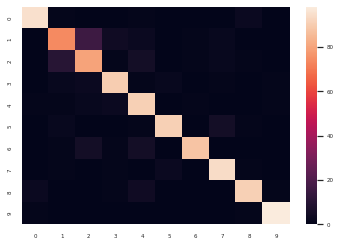

At step  10  and at epoch =  0  the loss is =  0.030366024002432823  and accuracy is =  0.29328571428571426
At step  10  and at epoch =  1  the loss is =  0.030089590698480606  and accuracy is =  0.38042857142857145
At step  10  and at epoch =  2  the loss is =  0.02637207694351673  and accuracy is =  0.474
At step  10  and at epoch =  3  the loss is =  0.025352824479341507  and accuracy is =  0.5241428571428571
At step  10  and at epoch =  4  the loss is =  0.02334417589008808  and accuracy is =  0.5698571428571428
At step  10  and at epoch =  5  the loss is =  0.02544373646378517  and accuracy is =  0.5927142857142857
At step  10  and at epoch =  6  the loss is =  0.022942043840885162  and accuracy is =  0.6035714285714285
At step  10  and at epoch =  7  the loss is =  0.018515897914767265  and accuracy is =  0.6301428571428571
At step  10  and at epoch =  8  the loss is =  0.026120716705918312  and accuracy is =  0.6532857142857142
At step  10  and at epoch =  9  the loss is =  0.02

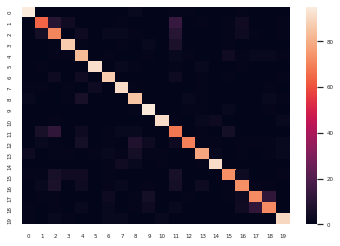

At step  20  and at epoch =  0  the loss is =  0.04109616577625275  and accuracy is =  0.26785714285714285
At step  20  and at epoch =  1  the loss is =  0.03896987810730934  and accuracy is =  0.3392857142857143
At step  20  and at epoch =  2  the loss is =  0.02964041382074356  and accuracy is =  0.437
At step  20  and at epoch =  3  the loss is =  0.03718454763293266  and accuracy is =  0.49685714285714283
At step  20  and at epoch =  4  the loss is =  0.03454594314098358  and accuracy is =  0.5385714285714286
At step  20  and at epoch =  5  the loss is =  0.028597187250852585  and accuracy is =  0.563
At step  20  and at epoch =  6  the loss is =  0.03535304591059685  and accuracy is =  0.6027142857142858
At step  20  and at epoch =  7  the loss is =  0.03645609691739082  and accuracy is =  0.6151428571428571
At step  20  and at epoch =  8  the loss is =  0.03423989564180374  and accuracy is =  0.6237142857142857
At step  20  and at epoch =  9  the loss is =  0.03207738324999809  a

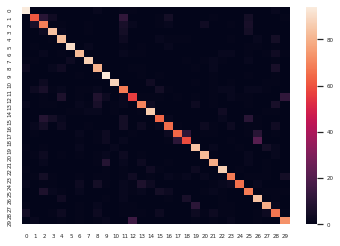

At step  30  and at epoch =  0  the loss is =  0.047356799244880676  and accuracy is =  0.2724679029957204
At step  30  and at epoch =  1  the loss is =  0.04599460959434509  and accuracy is =  0.35021398002853066
At step  30  and at epoch =  2  the loss is =  0.04371301829814911  and accuracy is =  0.42624821683309555
At step  30  and at epoch =  3  the loss is =  0.042441584169864655  and accuracy is =  0.47660485021398
At step  30  and at epoch =  4  the loss is =  0.04263845458626747  and accuracy is =  0.5102710413694722
At step  30  and at epoch =  5  the loss is =  0.039070889353752136  and accuracy is =  0.5425106990014266
At step  30  and at epoch =  6  the loss is =  0.04009871557354927  and accuracy is =  0.572039942938659
At step  30  and at epoch =  7  the loss is =  0.04068795591592789  and accuracy is =  0.58830242510699
At step  30  and at epoch =  8  the loss is =  0.03927459567785263  and accuracy is =  0.6035663338088445
At step  30  and at epoch =  9  the loss is = 

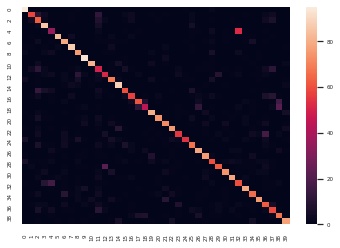

At step  40  and at epoch =  0  the loss is =  0.0570579469203949  and accuracy is =  0.27014285714285713
At step  40  and at epoch =  1  the loss is =  0.05883275717496872  and accuracy is =  0.33371428571428574
At step  40  and at epoch =  2  the loss is =  0.058996234089136124  and accuracy is =  0.38671428571428573
At step  40  and at epoch =  3  the loss is =  0.051977161318063736  and accuracy is =  0.4268571428571429
At step  40  and at epoch =  4  the loss is =  0.055674050003290176  and accuracy is =  0.45785714285714285
At step  40  and at epoch =  5  the loss is =  0.053309231996536255  and accuracy is =  0.48714285714285716
At step  40  and at epoch =  6  the loss is =  0.05848129466176033  and accuracy is =  0.5067142857142857
At step  40  and at epoch =  7  the loss is =  0.054785337299108505  and accuracy is =  0.5388571428571428
At step  40  and at epoch =  8  the loss is =  0.05516038462519646  and accuracy is =  0.5565714285714286
At step  40  and at epoch =  9  the l

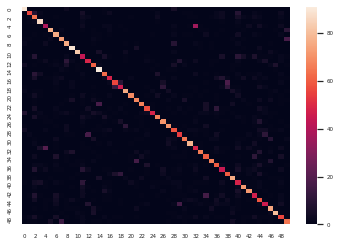

At step  50  and at epoch =  0  the loss is =  0.07140738517045975  and accuracy is =  0.25771428571428573
At step  50  and at epoch =  1  the loss is =  0.06861652433872223  and accuracy is =  0.3397142857142857
At step  50  and at epoch =  2  the loss is =  0.06468401849269867  and accuracy is =  0.40185714285714286
At step  50  and at epoch =  3  the loss is =  0.06117944419384003  and accuracy is =  0.4412857142857143
At step  50  and at epoch =  4  the loss is =  0.06230979785323143  and accuracy is =  0.47714285714285715
At step  50  and at epoch =  5  the loss is =  0.06065322831273079  and accuracy is =  0.496
At step  50  and at epoch =  6  the loss is =  0.06174367666244507  and accuracy is =  0.5164285714285715
At step  50  and at epoch =  7  the loss is =  0.06272317469120026  and accuracy is =  0.5382857142857143
At step  50  and at epoch =  8  the loss is =  0.06329348683357239  and accuracy is =  0.5528571428571428
At step  50  and at epoch =  9  the loss is =  0.0603573

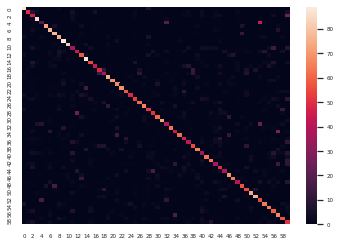

At step  60  and at epoch =  0  the loss is =  0.07571043074131012  and accuracy is =  0.24312320916905444
At step  60  and at epoch =  1  the loss is =  0.06969394534826279  and accuracy is =  0.32550143266475645
At step  60  and at epoch =  2  the loss is =  0.07809892296791077  and accuracy is =  0.3687679083094556
At step  60  and at epoch =  3  the loss is =  0.077652707695961  and accuracy is =  0.40186246418338106
At step  60  and at epoch =  4  the loss is =  0.07253296673297882  and accuracy is =  0.4220630372492837
At step  60  and at epoch =  5  the loss is =  0.0673932284116745  and accuracy is =  0.45830945558739256
At step  60  and at epoch =  6  the loss is =  0.07396821677684784  and accuracy is =  0.47679083094555874
At step  60  and at epoch =  7  the loss is =  0.06937094777822495  and accuracy is =  0.5030085959885386
At step  60  and at epoch =  8  the loss is =  0.07524464279413223  and accuracy is =  0.5107449856733525
At step  60  and at epoch =  9  the loss is 

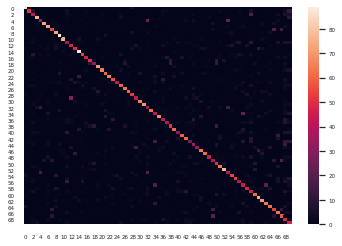

At step  70  and at epoch =  0  the loss is =  0.08975418657064438  and accuracy is =  0.2739687055476529
At step  70  and at epoch =  1  the loss is =  0.0861072838306427  and accuracy is =  0.3873399715504979
At step  70  and at epoch =  2  the loss is =  0.08527283370494843  and accuracy is =  0.45718349928876245
At step  70  and at epoch =  3  the loss is =  0.08664344251155853  and accuracy is =  0.49971550497866285
At step  70  and at epoch =  4  the loss is =  0.07941558212041855  and accuracy is =  0.533854907539118
At step  70  and at epoch =  5  the loss is =  0.08082135021686554  and accuracy is =  0.552773826458037
At step  70  and at epoch =  6  the loss is =  0.08369114995002747  and accuracy is =  0.5812233285917496
At step  70  and at epoch =  7  the loss is =  0.08187159895896912  and accuracy is =  0.595448079658606
At step  70  and at epoch =  8  the loss is =  0.08445025980472565  and accuracy is =  0.6157894736842106
At step  70  and at epoch =  9  the loss is =  0

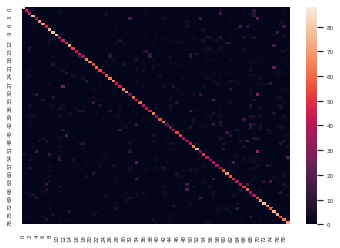

At step  80  and at epoch =  0  the loss is =  0.10433454066514969  and accuracy is =  0.25785714285714284
At step  80  and at epoch =  1  the loss is =  0.10242518037557602  and accuracy is =  0.35742857142857143
At step  80  and at epoch =  2  the loss is =  0.09879288822412491  and accuracy is =  0.40785714285714286
At step  80  and at epoch =  3  the loss is =  0.09430290758609772  and accuracy is =  0.451
At step  80  and at epoch =  4  the loss is =  0.09283017367124557  and accuracy is =  0.47885714285714287
At step  80  and at epoch =  5  the loss is =  0.09725122153759003  and accuracy is =  0.49885714285714283
At step  80  and at epoch =  6  the loss is =  0.09873324632644653  and accuracy is =  0.5234285714285715
At step  80  and at epoch =  7  the loss is =  0.09337771683931351  and accuracy is =  0.5388571428571428
At step  80  and at epoch =  8  the loss is =  0.09405454993247986  and accuracy is =  0.5577142857142857
At step  80  and at epoch =  9  the loss is =  0.09306

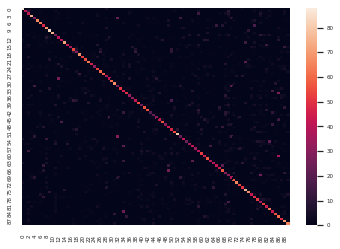

At step  90  and at epoch =  0  the loss is =  0.09890631586313248  and accuracy is =  0.2696275071633238
At step  90  and at epoch =  1  the loss is =  0.10666072368621826  and accuracy is =  0.4040114613180516
At step  90  and at epoch =  2  the loss is =  0.10273995250463486  and accuracy is =  0.46232091690544413
At step  90  and at epoch =  3  the loss is =  0.0993950366973877  and accuracy is =  0.497134670487106
At step  90  and at epoch =  4  the loss is =  0.11171770095825195  and accuracy is =  0.528080229226361
At step  90  and at epoch =  5  the loss is =  0.11017142981290817  and accuracy is =  0.540974212034384
At step  90  and at epoch =  6  the loss is =  0.10550718754529953  and accuracy is =  0.5634670487106017
At step  90  and at epoch =  7  the loss is =  0.10293025523424149  and accuracy is =  0.5830945558739254
At step  90  and at epoch =  8  the loss is =  0.10207685828208923  and accuracy is =  0.5921203438395416
At step  90  and at epoch =  9  the loss is =  0.

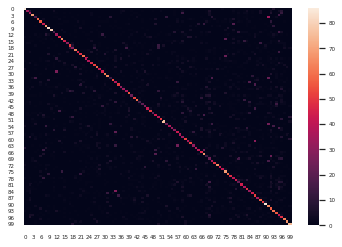

In [ ]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer, BIC = BIC)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()

In [ ]:
accs = [.89,.81,.76,.69,.64,.59,.55,.53,.49,.46]

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotTask(pars_tasks):

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy'])
  plt.xlabel("Epoch")
  plt.ylim(0,1)
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy'])
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


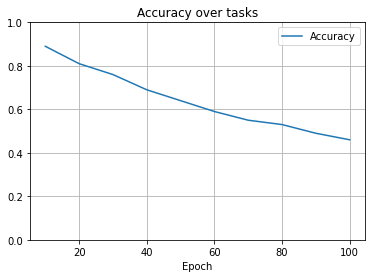

In [ ]:
plotTask(accs)